In [378]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torch.utils.data import random_split
from tqdm import tqdm

import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [379]:
trans = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor()
])

In [380]:
ds_mnist = torchvision.datasets.MNIST(".", download=True, train=True, transform=trans)
train_size = int(0.8 * len(ds_mnist))
test_size = len(ds_mnist) - train_size
train_dataset, test_dataset = random_split(ds_mnist, [train_size, test_size])

torch.Size([1, 28, 28])
torch.Size([28, 28])
5


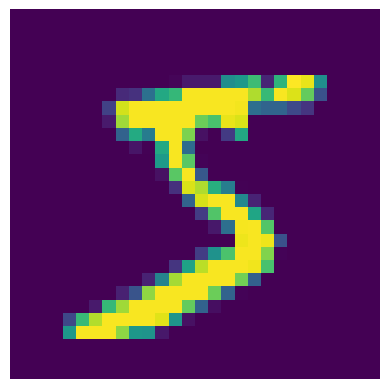

In [381]:
print(ds_mnist[0][0].shape)
print(ds_mnist[0][0].squeeze().shape)
plt.axis("off")
plt.imshow(ds_mnist[0][0].squeeze())
print(ds_mnist[0][1])

In [382]:
batch_size = 16
dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)

In [383]:
for img, label in dataloader:
    print(img.shape)
    print(label.shape)
    break

torch.Size([16, 1, 28, 28])
torch.Size([16])


In [384]:
class NeuralNumbers(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.conv1 = nn.Conv2d(1, 5, kernel_size=3,padding=1,stride=1)
        self.relu1 = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(2, 2)
        
        self.conv2 = nn.Conv2d(5, 25, kernel_size=3,padding=1,stride=1)
        self.relu2 = nn.ReLU()
        self.maxpool2 = nn.MaxPool2d(2, 2)
        
        self.flat = nn.Flatten()
        self.fc1 = nn.Linear(7 * 7 * 25, 100)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(100, 10)
        
        
    def forward(self, x):
        x = self.maxpool1(self.relu1(self.conv1(x)))
        x = self.maxpool2(self.relu2(self.conv2(x)))
        x = self.fc2(self.relu3(self.fc1(self.flat(x))))
        return x
    

In [385]:
model = NeuralNumbers()

In [386]:
loss_fn = nn.CrossEntropyLoss()

In [387]:
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01, momentum=0.9)

In [388]:
epochs = 5

for epoch in range(epochs):
    loss_val = 0
    for img, label in (pbar := tqdm(dataloader)):
        optimizer.zero_grad()
        pred = model(img)
        label = F.one_hot(label, 10).float()
        loss = loss_fn(pred, label)
        loss.backward()
        loss_val += loss.item()
        
        optimizer.step()
        
        pbar.set_description(f"loss: {loss.item():.5f}")
    print(loss_val / len(dataloader))

loss: 0.03174: 100%|██████████| 3000/3000 [00:20<00:00, 147.86it/s]


0.20829003108952504


loss: 0.00160: 100%|██████████| 3000/3000 [00:18<00:00, 163.41it/s]


0.05510665441883369


loss: 0.00349: 100%|██████████| 3000/3000 [00:18<00:00, 160.91it/s]


0.03830480370695235


loss: 0.01775: 100%|██████████| 3000/3000 [00:19<00:00, 152.48it/s]


0.029454212979089334


loss: 0.00119: 100%|██████████| 3000/3000 [00:19<00:00, 151.93it/s]

0.02255826224410445


In [389]:
print(model)

NeuralNumbers(
  (conv1): Conv2d(1, 5, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu1): ReLU()
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(5, 25, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2): ReLU()
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flat): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=1225, out_features=100, bias=True)
  (relu3): ReLU()
  (fc2): Linear(in_features=100, out_features=10, bias=True)
)


In [390]:
num = 45345
print(ds_mnist[num][1])
print(model(ds_mnist[num][0]).detach().numpy().argmax())
plt.axis("off")
plt.imshow(ds_mnist[num][0].squeeze())

9


RuntimeError: mat1 and mat2 shapes cannot be multiplied (25x49 and 1225x100)

In [ ]:
img = cv2.imread("2.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(img)
img.shape
img = np.expand_dims(img, axis=0)
img = np.expand_dims(img, axis=0)
img = torch.from_numpy(img)/255
print(img)
img.shape

In [ ]:
model.eval()
torch.argmax(model(img))

In [ ]:
success = 0
for img, label in test_dataset:
    if torch.argmax(model(img)) == label:
        success += 1
print(success/len(ds_mnist))